In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
import matplotlib.pyplot as plt
import nest
import pytest
import numpy as np
import os
import re

from pynestml.frontend import pynestml_frontend

from typing import List, Optional
from pynestml.codegeneration.nest_code_generator_utils import NESTCodeGeneratorUtils
from pynestml.codegeneration.nest_tools import NESTTools


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
from matplotlib import rcParams

text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=12)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title

In [3]:
import pynestml
pynestml.__version__

'7.0.2'

In [4]:
folder = "PW_Calcium_Based_Plasticity/"

In [5]:
help(NESTCodeGeneratorUtils.generate_code_for)

Help on method generate_code_for in module pynestml.codegeneration.nest_code_generator_utils:

generate_code_for(nestml_neuron_model: str, nestml_synapse_model: Union[str, NoneType] = None, module_name: Union[str, NoneType] = None, target_path: str = 'target', post_ports: Union[List[str], NoneType] = None, mod_ports: Union[List[str], NoneType] = None, logging_level: str = 'WARNING') method of builtins.type instance
    Generate code for a given neuron and synapse model, passed as a string.
    The neuron and synapse models can be passed directly as strings in NESTML syntax, or as filenames, in which case the NESTML model is loaded from the given filename.
    
    Returns
    -------
    If a synapse is specified, returns a tuple (module_name, mangled_neuron_name, mangled_synapse_name) containing the names that can be used in ``nest.Install()``, ``nest.Create()`` and ``nest.Connect()`` calls. If no synapse is specified, returns a tuple (module_name, mangled_neuron_name).



In [ ]:

module_name, neuron_model_name, synapse_model_name = NESTCodeGeneratorUtils.generate_code_for(
    nestml_neuron_model = "mhill_tononi_neuron.nestml",
    nestml_synapse_model = "stdp_ca_synapse.nestml",
    module_name = "nestml_mhill_tononi_module",
    post_ports = ["post_spikes"],
    target_path = "target_ht")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

ANTLR runtime and generated code versions disagree: 4.10!=4.13.0
ANTLR runtime and generated code versions disagree: 4.10!=4.13.0
[15,mhill_tononi_neuron_nestml, WARNING, [95:25;95:25]]: Implicit casting from (compatible) type '1 / ms' to 'real'.
[16,mhill_tononi_neuron_nestml, WARNING, [98:25;98:25]]: Implicit casting from (compatible) type '1 / ms' to 'real'.
ANTLR runtime and generated code versions disagree: 4.10!=4.13.0
ANTLR runtime and generated code versions disagree: 4.10!=4.13.0
[36,stdp_ca_synapse_nestml, WARNING, [12:8;12:28]]: Variable 'd' has the same name as a physical unit!
[53,stdp_ca_synapse_nestml, WARNING, [12:8;12:28]]: Variable 'd' has the 

# Now we can use the new module

In [7]:
delta_t = 10  # ms

Receptor types: {'AMPA': 1, 'NMDA': 2}
recordables:  ('p', 'V_m', 'Theta', 'IKNa_D', 'cai_CR', 'cstar', 'm_VDCC', 'h_VDCC', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'I_Ca_vdcc', 'I_syn_nmda', 'w__for_stdp_ca_synapse_nestml')
{'available': (0,), 'beta_Ca': 0.001, 'Ca': 0.0, 'capacity': (2,), 'E_K': -90.0, 'E_Na': 30.0, 'element_type': 'neuron', 'elementsize': 1160, 'frozen': False, 'g_KL': 1.0, 'g_NaL': 0.2, 'global_id': 0, 'gsl_error_tol': 0.001, 'I_e': 0.0, 'instantiations': (2,), 'local': True, 'model': 'mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml', 'model_id': 100, 'node_uses_wfr': False, 'p': 0.0, 'receptor_types': {'AMPA': 1, 'NMDA': 2}, 'recordables': ('p', 'V_m', 'Theta', 'IKNa_D', 'cai_CR', 'cstar', 'm_VDCC', 'h_VDCC', 'g_AMPA__X__AMPA', 'g_AMPA__DOLLAR__X__AMPA', 'g_NMDA__X__NMDA', 'g_NMDA__DOLLAR__X__NMDA', 'I_Ca_vdcc', 'I_syn_nmda', 'w__for_stdp_ca_synapse_nestml'), 'synaptic_elements': {}, 't_ref': 700.0, 't_spi

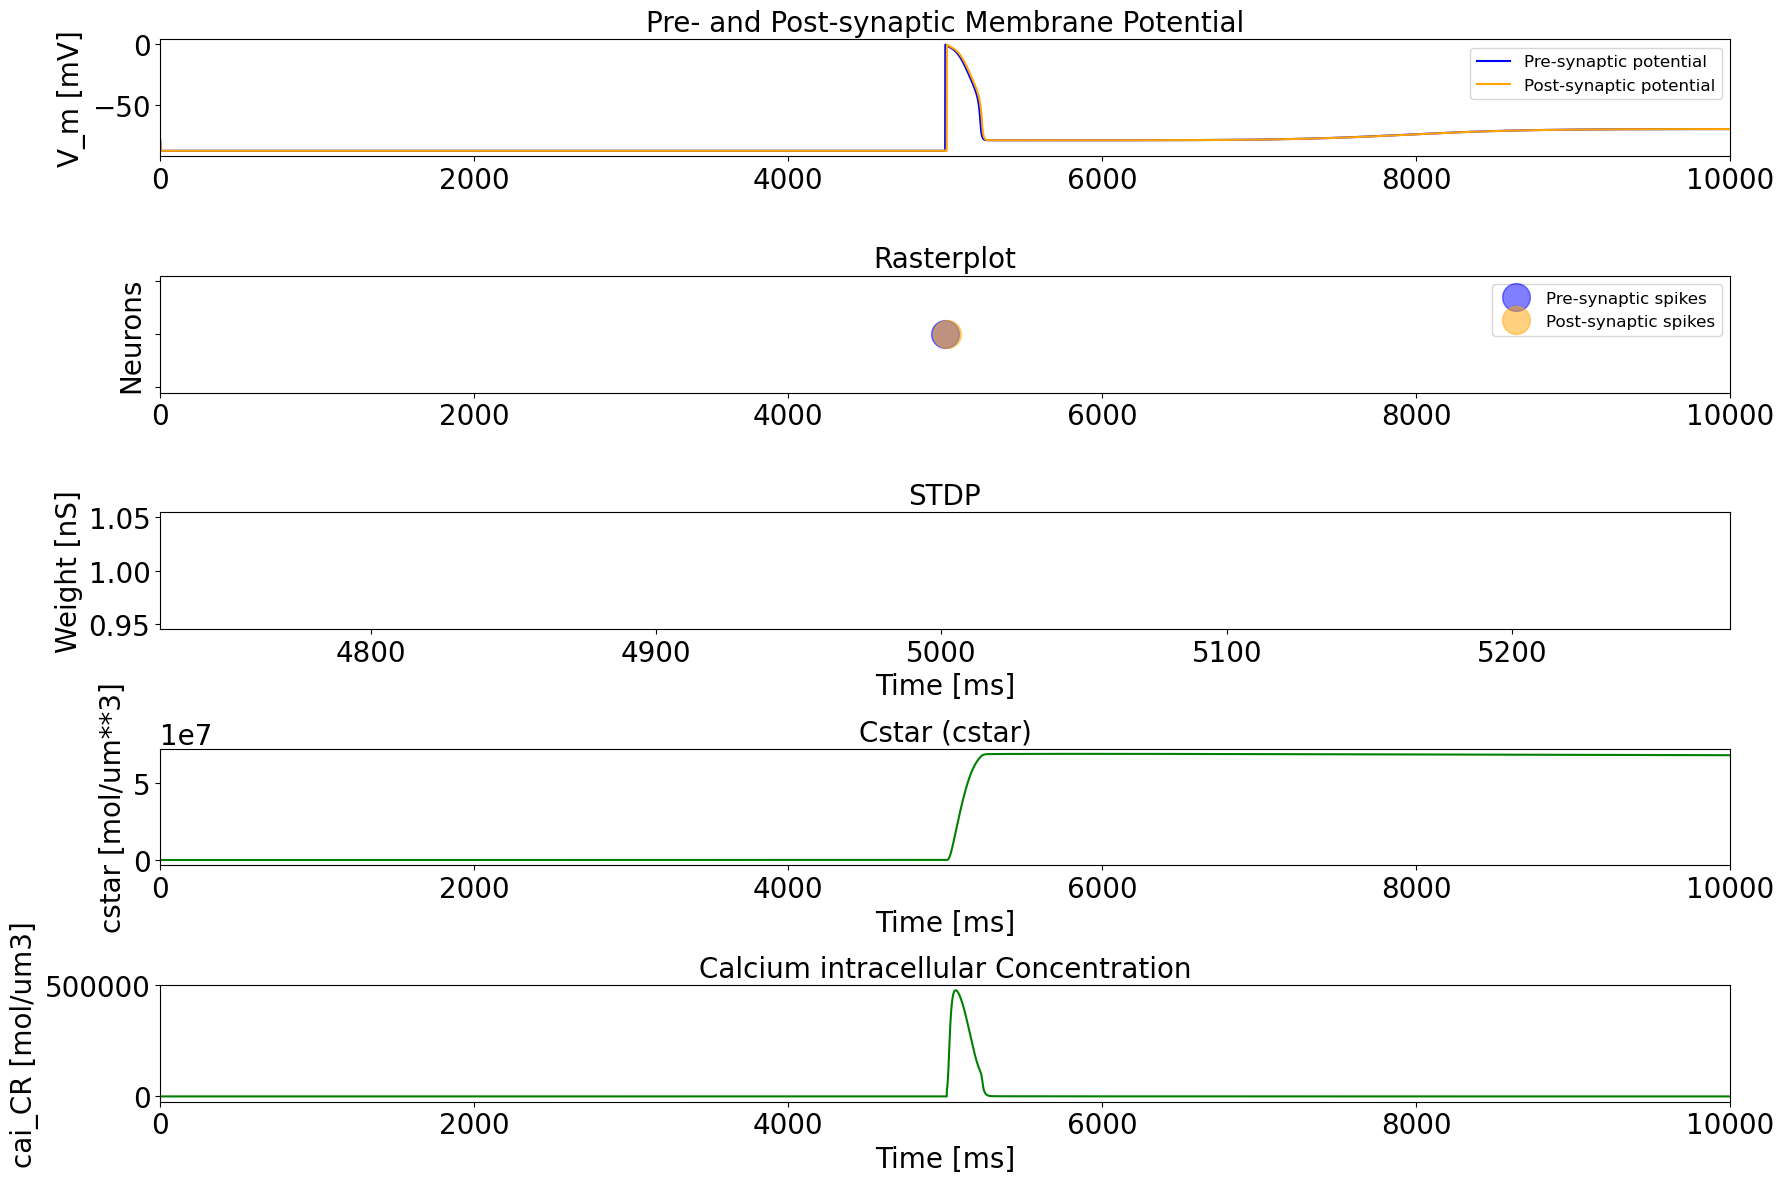

In [13]:
#os.environ['LD_LIBRARY_PATH'] = '/tmp/nestml_target:' + os.environ.get('LD_LIBRARY_PATH', '')
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

duration = 10000 # ms
frequency = 0.2  # HzNESTCodeGeneratorUtils.generate_code_for()

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

recordables = nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml')['recordables']
print("recordables: ", recordables)

print(nest.GetDefaults('mhill_tononi_neuron_nestml__with_stdp_ca_synapse_nestml'))

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'stdp_ca_synapse_nestml__with_mhill_tononi_neuron_nestml',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })


#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)

conns = nest.GetConnections()
print(conns.get())


interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

mm = nest.Create('multimeter', 1, {'record_from': ['I_Ca_vdcc','cai_CR', 'I_syn_nmda', 'p', 'cstar' ]})

nest.SetStatus(mm, {'interval': 0.1})

nest.Connect(mm, post_neuron)

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 1,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    },
                                   {
                                    'synapse_model':'static_synapse',
                                     'receptor_type': 2,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                   })
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 1,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    },
                                   {
                                    'synapse_model':'static_synapse',
                                     'receptor_type': 2,
                                     "weight": 999.0,
                                     "delay": 1.0 + delta_post,
                                   })

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)

nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)


nest.Simulate(duration)
spikes = sd.get(['events'][0])

# Assuming mm, vm_pre, vm_post, spikes, and wr have already been set up correctly
fig, ax = plt.subplots(5, figsize=(18, 12))  # Increase to 4 subplots

# Pre- and Post-synaptic potentials
ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color="b", label="Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color="orange", label="Post-synaptic potential")
ax[0].set_title("Pre- and Post-synaptic Membrane Potential")
ax[0].set_ylabel("V_m [mV]")
ax[0].set_xlim([0, 10000])
ax[0].legend()

# Raster plot
ax[1].set_title("Rasterplot")
ax[1].plot(spikes['times'][np.where(spikes['senders'] == 1)], spikes['senders'][np.where(spikes['senders'] == 1)], '.', markersize=40, alpha=0.5, color="b", label="Pre-synaptic spikes")
ax[1].plot(spikes['times'][np.where(spikes['senders'] == 2)], spikes['senders'][np.where(spikes['senders'] == 2)] - 1, '.', markersize=40, alpha=0.5, color="orange", label="Post-synaptic spikes")
ax[1].legend()
ax[1].set_ylabel("Neurons")
ax[1].set_yticklabels("")
ax[1].set_xlim([0, 10000])

# STDP Weight Changes
ax[2].plot(wr.events["times"], wr.events["weights"], color="r")
ax[2].set_title("STDP")
ax[2].set_ylabel("Weight [nS]")
ax[2].set_xlabel("Time [ms]")

# Calcium Current (I_Ca_vdcc)
events = nest.GetStatus(mm, "events")[0]
times = events["times"]
cstar = events["cstar"]
ax[3].plot(times, cstar , color="g")
ax[3].set_title("Cstar (cstar)")
ax[3].set_ylabel("cstar [mol/um**3]")
ax[3].set_xlabel("Time [ms]")
ax[3].set_xlim([0, 10000])

# Calcium Current (I_Ca_vdcc)
cai_CR = events["cai_CR"]
ax[4].plot(times, cai_CR, color="g")
ax[4].set_title("Calcium intracellular Concentration")
ax[4].set_ylabel("cai_CR [mol/um3]")
ax[4].set_xlabel("Time [ms]")
ax[4].set_xlim([0, 10000])

fig.tight_layout()
plt.show()


Receptor types: {'AMPA': 1, 'NMDA': 2}
{'Wmax': [100.0, 100.0], 'Wmin': [0.0, 0.0], 'alpha': [1.0, 1.0], 'delay': [1.0, 1.0], 'lambda': [0.01, 0.01], 'mu_minus': [1.0, 1.0], 'mu_plus': [1.0, 1.0], 'port': [0, 1], 'pre_trace': [0.0, 0.0], 'receptor': [0, 1], 'sizeof': [136, 136], 'source': [1, 1], 'synapse_id': [74, 74], 'synapse_model': ['stdp_nestml__with_mhill_tononi_neuron_nestml', 'stdp_nestml__with_mhill_tononi_neuron_nestml'], 'target': [2, 2], 'target_thread': [0, 0], 'tau_tr_post': [20.0, 20.0], 'tau_tr_pre': [20.0, 20.0], 'w': [1.0, 1.0], 'weight': [1.0, 1.0]}


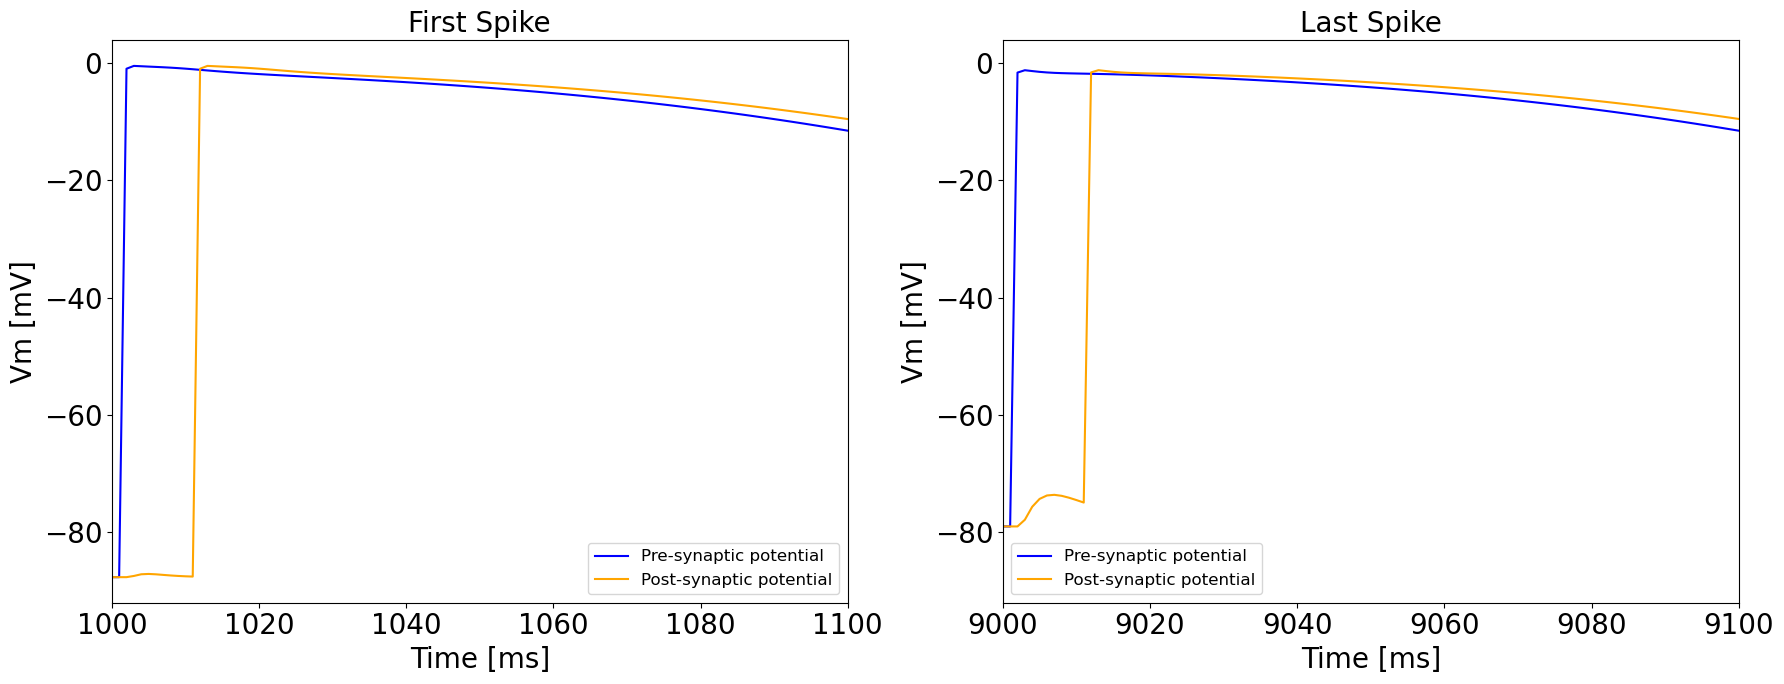

In [9]:
#os.environ['LD_LIBRARY_PATH'] = '/tmp/nestml_target:' + os.environ.get('LD_LIBRARY_PATH', '')
nest.ResetKernel()
nest.Install( "target_ht/nestml_mhill_tononi_module")
nest.set_verbosity("M_ERROR")

duration = 10000 # ms
frequency = 1.0  # HzNESTCodeGeneratorUtils.generate_code_for()

pre_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_nestml", 1)
post_neuron = nest.Create("mhill_tononi_neuron_nestml__with_stdp_nestml", 1)

receptor_types = nest.GetDefaults("mhill_tononi_neuron_nestml__with_stdp_nestml")["receptor_types"]
print("Receptor types:", receptor_types)

wr = nest.Create("weight_recorder")
#nest.SetDefaults("static_synapse", {"weight_recorder": wr[0]})
nest.SetDefaults("stdp_nestml__with_mhill_tononi_neuron_nestml", {"weight_recorder": wr[0]})

syn_spec = nest.CollocatedSynapses(
                                    {'synapse_model':'stdp_nestml__with_mhill_tononi_neuron_nestml',
                                     'receptor_type':receptor_types['AMPA'], 
                                    },
                                   {
                                    'synapse_model':'stdp_nestml__with_mhill_tononi_neuron_nestml',
                                    'receptor_type': receptor_types['NMDA'], 
                                   })


#nest.Connect(pre_neuron, post_neuron, "one_to_one", "static_synapse")
nest.Connect(pre_neuron, post_neuron, "one_to_one", syn_spec=syn_spec)

conns = nest.GetConnections()
print(conns.get())


interval = 1000.0 / frequency
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t

else:
    delta_pre = -1 * delta_t
    delta_post = 0.0
    
syn_spec_spike_pre = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 1,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                    },
                                   {
                                    'synapse_model':'static_synapse',
                                     'receptor_type': 2,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_pre,
                                   })
syn_spec_spike_post = nest.CollocatedSynapses(
                                    {'synapse_model':'static_synapse',
                                     'receptor_type': 1,
                                     'weight': 999.0,
                                     'delay': 1.0 + delta_post,
                                    },
                                   {
                                    'synapse_model':'static_synapse',
                                     'receptor_type': 2,
                                     "weight": 999.0,
                                     "delay": 1.0 + delta_post,
                                   })

nest.Connect(spike_generator, pre_neuron, "one_to_one", syn_spec=syn_spec_spike_pre)

nest.Connect(spike_generator, post_neuron, "one_to_one", syn_spec=syn_spec_spike_post)

sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)
nest.Connect(post_neuron, sd)

vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)
nest.Connect(vm_post, post_neuron)


nest.Simulate(duration)
spikes = sd.get(['events'][0])


#print(sd.events)
fig, ax = plt.subplots(1, 2, figsize = (18,7))

ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color = "b", label = "Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color = "orange",  label = "Post-synaptic potential")
ax[0].set_title("First Spike")
ax[0].set_ylabel("Vm [mV]")
ax[0].set_xlim([1000,1100])
ax[0].set_xlabel("Time [ms]")
ax[0].legend()

ax[1].plot(vm_pre.events["times"], vm_pre.events["V_m"], color = "b", label = "Pre-synaptic potential")
ax[1].plot(vm_post.events["times"], vm_post.events["V_m"], color = "orange",  label = "Post-synaptic potential")
ax[1].set_title("Last Spike")
ax[1].set_ylabel("Vm [mV]")
ax[1].set_xlim([9000, 9100])
ax[1].set_xlabel("Time [ms]")
ax[1].legend()

fig.tight_layout()